<a href="https://colab.research.google.com/github/iamsonia9/iamsonia9/blob/main/Assignment8(Sonia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("/content/car_data (2).csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.shape

(804, 12)

In [5]:
df["Price"].describe()

count      804.000000
mean     21343.143767
std       9884.852801
min       8638.930895
25%      14273.073870
50%      18024.995019
75%      26717.316636
max      70755.466717
Name: Price, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


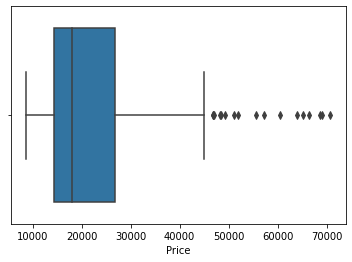

In [6]:
sns.boxplot(df["Price"])

In [65]:
per25 = df["Price"].quantile(0.25)
per75 = df["Price"].quantile(0.75)

In [67]:
per25

14273.073870330325

In [66]:
per75

26717.3166356619

In [68]:
iqr = per75-per25
iqr

12444.242765331575

In [69]:
upper_limit = per75+1.5*iqr
lower_limit = per25-1.5*iqr

In [70]:
print("Upper Limit",upper_limit)
print("Lower Limit",lower_limit)

Upper Limit 45383.68078365926
Lower Limit -4393.290277667038


In [13]:
df[df["Price"]>upper_limit]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
80,51154.047216,2202,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,1,1
81,49248.158967,6685,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,0,1
82,46747.673270,15343,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,1,1
140,48310.329545,788,Cadillac,STS-V8,Sedan 4D,Sedan,8,4.6,4,1,0,1
141,48365.980897,2616,Cadillac,STS-V8,Sedan 4D,Sedan,8,4.6,4,1,1,1
150,70755.466717,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
151,68566.187189,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
152,69133.731722,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
153,66374.307040,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
154,65281.481237,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1


In [14]:
new_lower = df[df["Price"]<lower_limit]
new_lower

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather


In [15]:
new_df = df[df["Price"]<upper_limit]

In [16]:
new_df.shape

(787, 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


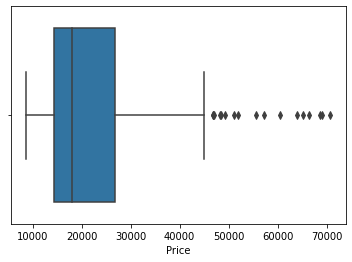

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


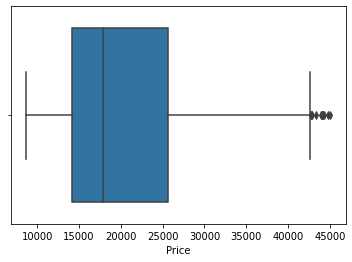

In [17]:
sns.boxplot(df['Price'])
plt.show()
sns.boxplot(new_df['Price'])
plt.show()

In [71]:
new_df_cap = df.copy()
new_df_cap['Price']= np.where(
    new_df_cap["Price"]>upper_limit,
    upper_limit,
    np.where(
        new_df_cap["Price"]<lower_limit,
        lower_limit,
        new_df_cap["Price"]
    )
)

In [19]:
new_df_cap.shape

(804, 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


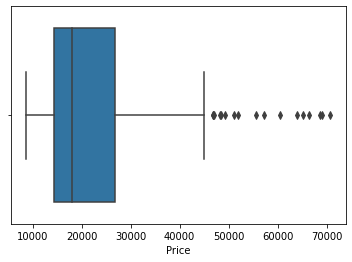

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


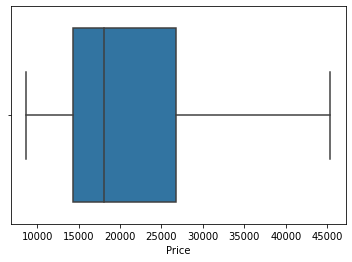

In [72]:
sns.boxplot(df['Price'])
plt.show()
sns.boxplot(new_df_cap['Price'])
plt.show()

In [21]:
df["Mileage"].describe()

count      804.000000
mean     19831.934080
std       8196.319707
min        266.000000
25%      14623.500000
50%      20913.500000
75%      25213.000000
max      50387.000000
Name: Mileage, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


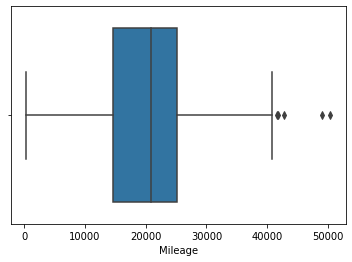

In [22]:
sns.boxplot(df["Mileage"])

In [23]:
per25 = df["Mileage"].quantile(0.25)
per75 = df["Mileage"].quantile(0.75)

In [24]:
iqr = per75-per25
iqr

10589.5

In [25]:
upper_limit = per75+1.5*iqr
lower_limit = per25-1.5*iqr

In [26]:
print("Upper Limit",upper_limit)
print("Lower Limit",lower_limit)

Upper Limit 41097.25
Lower Limit -1260.75


In [27]:
df[df["Mileage"]>upper_limit]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
119,32537.186751,41829,Cadillac,Deville,DTS Sedan 4D,Sedan,8,4.6,4,1,1,1
159,52001.994379,42691,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
529,15792.831437,41566,Pontiac,G6,Sedan 4D,Sedan,6,3.5,4,1,1,1
649,22244.876553,50387,SAAB,9_3,Linear Sedan 4D,Sedan,4,2.0,4,1,0,1
679,28777.959695,48991,SAAB,9_3 HO,Arc Conv 2D,Convertible,4,2.0,2,1,1,1


In [28]:
new_lower = df[df["Price"]<lower_limit]
new_lower

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather


In [29]:
new_df = df[df["Mileage"]<upper_limit]

In [30]:
new_df.shape

(799, 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


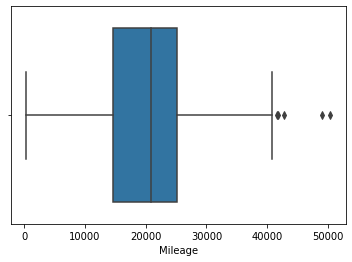

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


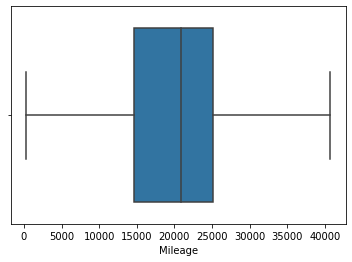

In [31]:
sns.boxplot(df['Mileage'])
plt.show()
sns.boxplot(new_df['Mileage'])
plt.show()

In [32]:
new_df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,21287.275019,19673.856070,5.264080,3.035419,3.529412,0.750939,0.678348,0.722153
std,9842.539866,7967.875493,1.383432,1.104915,0.848896,0.432740,0.467403,0.448218
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14261.330129,14596.000000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18004.870415,20870.000000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26495.534994,25158.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,40719.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Price')

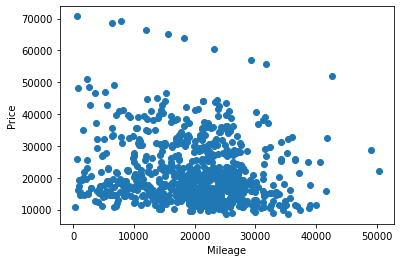

In [73]:
#plotting graph between price vs mileage
plt.scatter(df['Mileage'],df['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')

In [75]:
df[['Mileage','Price']].corr()      #There is no linear relation between mileage and price

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [76]:
X = df[['Mileage']].values 
y = df['Price'].values                 

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [80]:
lr.score(X_train,y_train)

0.009799614937648471

In [81]:
c = lr.intercept_
m=lr.coef_

In [82]:
print('The Linear Regression is : y = ',m,'X+',c)

The Linear Regression is : y =  [-0.11881585] X+ 23611.04343923746


Text(0, 0.5, 'Price')

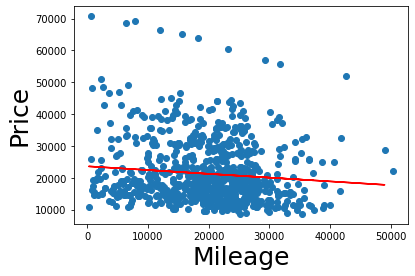

In [83]:
plt.scatter(df['Mileage'],df['Price'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('Mileage',fontsize = 25)
plt.ylabel('Price',fontsize = 25)

In [84]:
y_pred = lr.predict(X_test)

In [85]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,23406.689820,20594.665512
1,17803.279089,22149.252064
2,21525.339008,20638.270928
3,24896.597604,21084.305621
4,13041.873997,21994.316199


In [86]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.04599432897974931


In [42]:
lr.score(X,y)

0.02747126380051612

Tasks, Part 2

In [90]:
df.head()

,Actual,Predicted
0,23406.689820,20594.665512
1,17803.279089,22149.252064
2,21525.339008,20638.270928
3,24896.597604,21084.305621
4,13041.873997,21994.316199


TASK 2

In [93]:
df = pd.read_csv("/content/car_data (2).csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [94]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


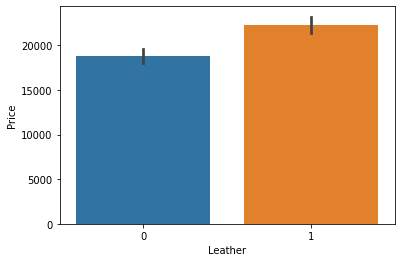

In [46]:
sns.barplot(df["Leather"],df["Price"])

In [44]:
#mileage, cylinders, liters, doors, cruise, sound, and leather

In [95]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values 
y = df['Price'].values 

In [47]:
new_df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [98]:
scaler.var_

array([6.73135945e+07, 1.97226744e+00, 1.27360574e+00, 7.22043106e-01,
       1.84549969e-01, 2.16036319e-01, 2.00193978e-01])

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [100]:
coeff_df = pd.DataFrame(lr.coef_,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns=['Coefficient'])
y_pred = lr.predict(X_test_scaled)
coeff_df

,Coefficient
Mileage,-1700.641969
Cylinder,6293.001277
Liter,-1477.395248
Doors,-1501.879572
Cruise,2537.735747
Sound,-676.844753
Leather,1596.777032


In [103]:
lr.intercept_

21519.09832013323

In [104]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.22275697762475632


Find the combination of the factors that is the best predictor for price

In [105]:

from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],selector.support_))

[('Mileage', True),
 ('Cylinder', True),
 ('Liter', True),
 ('Doors', True),
 ('Cruise', True),
 ('Sound', False),
 ('Leather', True)]

In [106]:

from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],sfs.get_support())))

[('Mileage', False), ('Cylinder', True), ('Liter', False), ('Doors', False), ('Cruise', True), ('Sound', False), ('Leather', False)]


Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [107]:
df=pd.get_dummies(df,columns=["Make","Model","Trim","Type"])
df.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [108]:
df.columns

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D',
       'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Trim_Arc Wagon 4D',
       'Trim_CX Sedan 4D', 'Trim_CXL Sedan 4D', 'Trim_CXS Se

In [109]:
X = df[['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']].values 
y = df['Price'].values

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Scaling

In [111]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [112]:
scaler.var_

array([0.0921081 , 0.09822735, 0.24024729, 0.1498371 , 0.11126403,
       0.06907744, 0.00464386, 0.02867585, 0.03736858, 0.03159277,
       0.02129888, 0.06508662, 0.03304398, 0.01531023, 0.01380098,
       0.08078868, 0.01531023, 0.01380098, 0.05833851, 0.02426418,
       0.04022745, 0.02426418, 0.01076795, 0.02278395, 0.03593188,
       0.03013673, 0.06105227, 0.00924419, 0.03880043, 0.02129888,
       0.06508662, 0.03880043, 0.02426418, 0.01228688, 0.01076795,
       0.01380098, 0.03736858, 0.01531023, 0.05697438, 0.15565644,
       0.07039804, 0.24114703, 0.07039804])

Model fitting

In [113]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [114]:
coeff_df = pd.DataFrame(lr.coef_,['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'], columns=['Coefficient'])
y_pred = lr.predict(X_test_scaled)
coeff_df

,Coefficient
Make_Buick,-5.242114e+15
Make_Cadillac,1.908534e+16
Make_Chevrolet,-3.283129e+16
Make_Pontiac,-4.492100e+16
Make_SAAB,-9.648624e+16
Make_Saturn,9.670265e+16
Model_9-2X AWD,1.241891e+16
Model_9_3,3.086042e+16
Model_9_3 HO,3.522873e+16
Model_9_5,3.239199e+16


In [115]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,26012.374625,28649.859824
1,19423.165022,17869.859824
2,15138.400824,16793.859824
3,30392.750158,30565.859824
4,14568.002255,13245.859824


In [116]:

from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9394273018247921


2. Find the best combination of factors to predict price.


In [117]:

from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'],selector.support_))

[('Make_Buick', False),
 ('Make_Cadillac', True),
 ('Make_Chevrolet', False),
 ('Make_Pontiac', False),
 ('Make_SAAB', False),
 ('Make_Saturn', False),
 ('Model_9-2X AWD', False),
 ('Model_9_3', False),
 ('Model_9_3 HO', False),
 ('Model_9_5', False),
 ('Model_9_5 HO', False),
 ('Model_AVEO', False),
 ('Model_Bonneville', False),
 ('Model_CST-V', False),
 ('Model_CTS', False),
 ('Model_Cavalier', False),
 ('Model_Century', False),
 ('Model_Classic', False),
 ('Model_Cobalt', False),
 ('Model_Corvette', False),
 ('Model_Deville', False),
 ('Model_G6', False),
 ('Model_GTO', False),
 ('Model_Grand Am', False),
 ('Model_Grand Prix', False),
 ('Model_Impala', False),
 ('Model_Ion', False),
 ('Model_L Series', False),
 ('Model_Lacrosse', False),
 ('Model_Lesabre', False),
 ('Model_Malibu', False),
 ('Model_Monte Carlo', False),
 ('Model_Park Avenue', False),
 ('Model_STS-V6', False),
 ('Model_STS-V8', False),
 ('Model_Sunfire', False),
 ('Model_Vibe', False),
 ('Model_XLR-V8', False),
 ('Ty